In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
%matplotlib inline


In [2]:
train= pd.read_csv('train.csv')


In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(42000, 785)

In [5]:
np.random.seed(1)
train=train.iloc[np.random.permutation(len(train))]#random permutation for data
#seed is used to get the same permutatipon every time


In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
29633,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
345,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36369,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16624,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14389,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
## dividing the dataset into training and cross-validation set for this we use 90% of the dataset for training and 10% for cross-validation


In [8]:
sample_size= train.shape[0]
valid_size=int(sample_size*0.1)

X_train=np.asarray(train.iloc[:sample_size-valid_size,1:]).reshape(sample_size-valid_size,28,28,1)
y_train=np.asarray(train.iloc[:sample_size-valid_size,0]).reshape(sample_size-valid_size,1)

# validation_set

X_valid=np.asarray(train.iloc[sample_size-valid_size:,1:]).reshape(valid_size,28,28,1)
y_valid=np.asarray(train.iloc[sample_size-valid_size:,0]).reshape(valid_size,1)

In [9]:
X_train.shape,y_train.shape

((37800, 28, 28, 1), (37800, 1))

In [10]:
X_valid.shape,y_valid.shape

((4200, 28, 28, 1), (4200, 1))

### Loading test dataset

In [11]:
test=pd.read_csv('test.csv')

In [12]:
test=np.asarray(test).reshape(test.shape[0],28,28,1)

In [13]:
test.shape

(28000, 28, 28, 1)

### Normalise Pixel Data

In [14]:
X_train=X_train/255
X_valid=X_valid/255
test=test/255

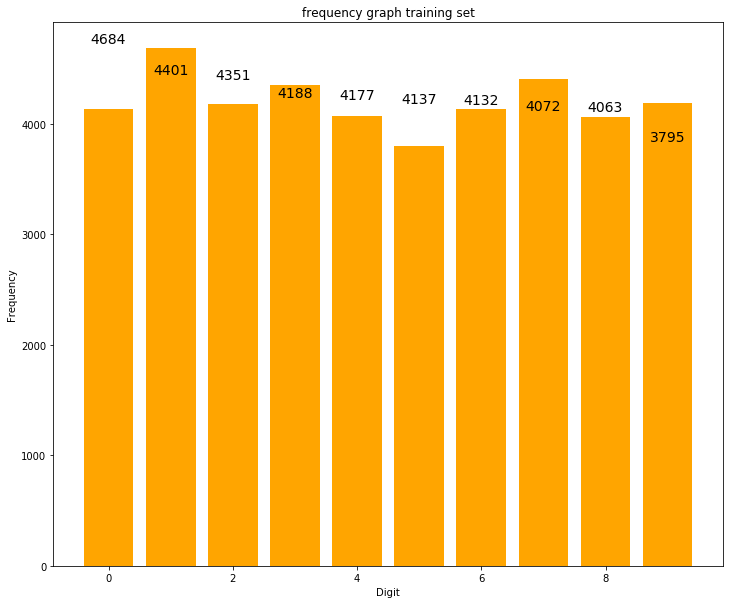

In [15]:
count=train['label'].value_counts()
plt.figure(figsize=(12,10))
plt.tick_params()

plt.bar(count.index,count.values,color='orange')

plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.title('frequency graph training set')

for i in count.index:
    plt.text(i,count.values[i]+50,str(count.values[i]),horizontalalignment='center',fontsize=14)


In [16]:
count.values

array([4684, 4401, 4351, 4188, 4177, 4137, 4132, 4072, 4063, 3795],
      dtype=int64)

In [17]:
## it seems that their is good distribution of data among all difeerent classes.


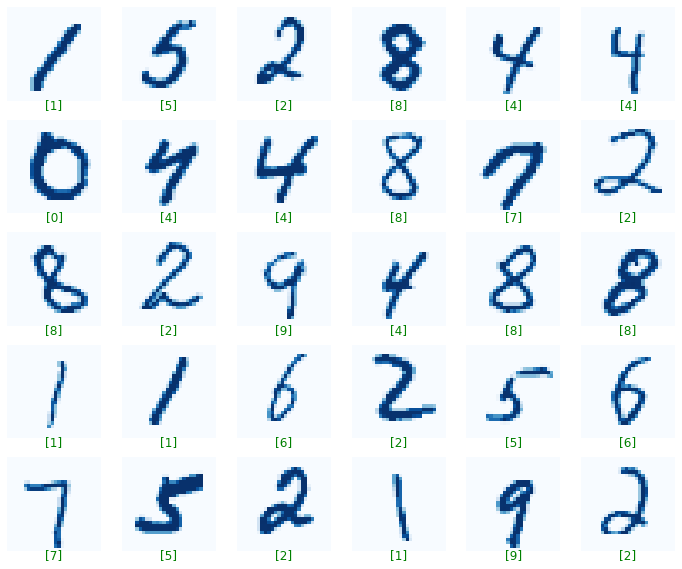

In [18]:
cols=6
rows=5

f=plt.figure(figsize=(2*cols,2*rows))

for i in range(rows*cols):
    f.add_subplot(rows,cols,i+1)
    plt.imshow(X_train[i].reshape([28,28]),cmap='Blues')
    plt.axis("off")
    plt.title(str(y_train[i]),y=-0.15,color="green")

## Building Model

In [19]:
from keras.models import Sequential
from keras.layers import LeakyReLU,Dense,Convolution2D,Dropout,MaxPooling2D,Flatten
from keras.optimizers import Adam

Using TensorFlow backend.


In [20]:
model= Sequential()

In [21]:
#Block1
model.add(Convolution2D(filters=32,kernel_size=(3,3),padding="same",input_shape=(28,28,1)))

model.add(LeakyReLU())
model.add(Convolution2D(32,3,padding='same'))
model.add(LeakyReLU())
model.add(MaxPooling2D())
model.add(Dropout(0.5))

#Block2
model.add(Convolution2D(32,3,padding='same'))
model.add(LeakyReLU())
model.add(Convolution2D(32,3,padding='same'))
model.add(LeakyReLU())
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))



In [22]:
loss = "sparse_categorical_crossentropy"
model.compile(optimizer=Adam(), loss=loss ,metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)       

In [23]:
history=model.fit(X_train,y_train,batch_size=256,epochs=20,validation_data=[X_valid,y_valid])

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 69s 2ms/step - loss: 0.4817 - accuracy: 0.8439 - val_loss: 0.1247 - val_accuracy: 0.9614
Epoch 2/20
37800/37800 [==============================] - 48s 1ms/step - loss: 0.1242 - accuracy: 0.9614 - val_loss: 0.0825 - val_accuracy: 0.9743
Epoch 3/20
37800/37800 [==============================] - 49s 1ms/step - loss: 0.0893 - accuracy: 0.9726 - val_loss: 0.0678 - val_accuracy: 0.9767
Epoch 4/20
37800/37800 [==============================] - 50s 1ms/step - loss: 0.0672 - accuracy: 0.9784 - val_loss: 0.0503 - val_accuracy: 0.9840
Epoch 5/20
37800/37800 [==============================] - 49s 1ms/step - loss: 0.0592 - accuracy: 0.9817 - val_loss: 0.0480 - val_accuracy: 0.9867
Epoch 6/20
37800/37800 [==============================] - 50s 1ms/step - loss: 0.0513 - accuracy: 0.9834 - val_loss: 0.0429 - val_accuracy: 0.9852
Epoch 7/20
37800/37800 [==============================] - 49s 1ms/ste

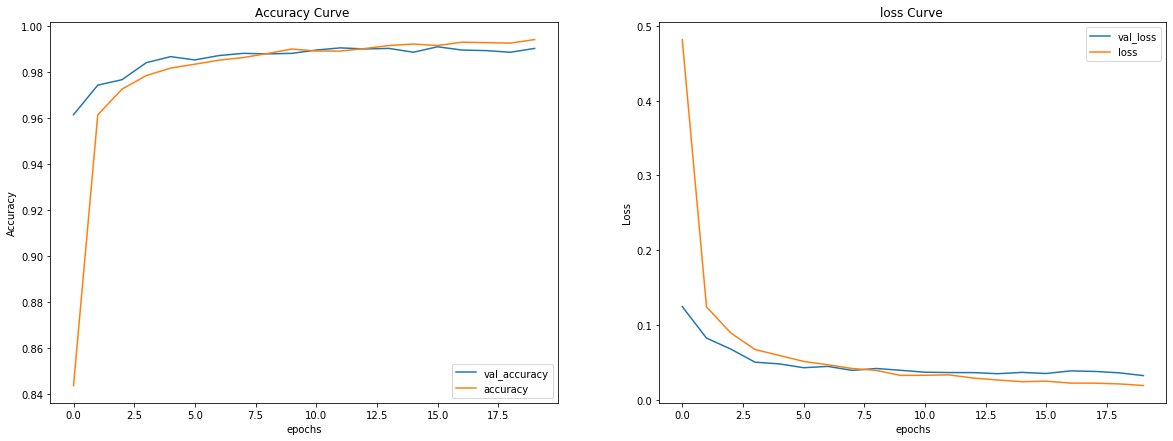

In [24]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(history.epoch,history.history['val_accuracy'],label="val_accuracy")
plt.plot(history.epoch,history.history['accuracy'],label="accuracy")
plt.title('Accuracy Curve ')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.epoch,history.history['val_loss'],label="val_loss")
plt.plot(history.epoch,history.history['loss'],label="loss")
plt.title('loss Curve ')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()


## Image Augumentation


In [25]:
from keras.preprocessing.image import ImageDataGenerator

In [26]:
datagen=ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
    zca_whitening=False,
                 )
new_data=datagen.fit(X_train)

In [27]:
from keras.callbacks import ReduceLROnPlateau

In [28]:
lrr=ReduceLROnPlateau(monitor='val_loss',
    factor=0.1,
    patience=2,
    verbose=1,
    min_lr=0.00001)

In [29]:
history2=model.fit_generator(datagen.flow(X_train,y_train,batch_size=256),
                            steps_per_epoch=int(X_train.shape[0]/256)+1,
                             epochs=20,
                             validation_data=[X_valid,y_valid],callbacks=[lrr])

Epoch 1/20
148/148 [==============================] - 49s 329ms/step - loss: 0.4724 - accuracy: 0.8628 - val_loss: 0.0742 - val_accuracy: 0.9764
Epoch 2/20
148/148 [==============================] - 49s 332ms/step - loss: 0.1623 - accuracy: 0.9497 - val_loss: 0.0686 - val_accuracy: 0.9755
Epoch 3/20
148/148 [==============================] - 50s 340ms/step - loss: 0.1296 - accuracy: 0.9592 - val_loss: 0.0481 - val_accuracy: 0.9850
Epoch 4/20
148/148 [==============================] - 51s 347ms/step - loss: 0.1152 - accuracy: 0.9636 - val_loss: 0.0480 - val_accuracy: 0.9831
Epoch 5/20
148/148 [==============================] - 55s 370ms/step - loss: 0.1002 - accuracy: 0.9690 - val_loss: 0.0323 - val_accuracy: 0.9895
Epoch 6/20
148/148 [==============================] - 50s 338ms/step - loss: 0.0962 - accuracy: 0.9703 - val_loss: 0.0329 - val_accuracy: 0.9888
Epoch 7/20
148/148 [==============================] - 50s 338ms/step - loss: 0.0894 - accuracy: 0.9723 - val_loss: 0.0395 - val_ac

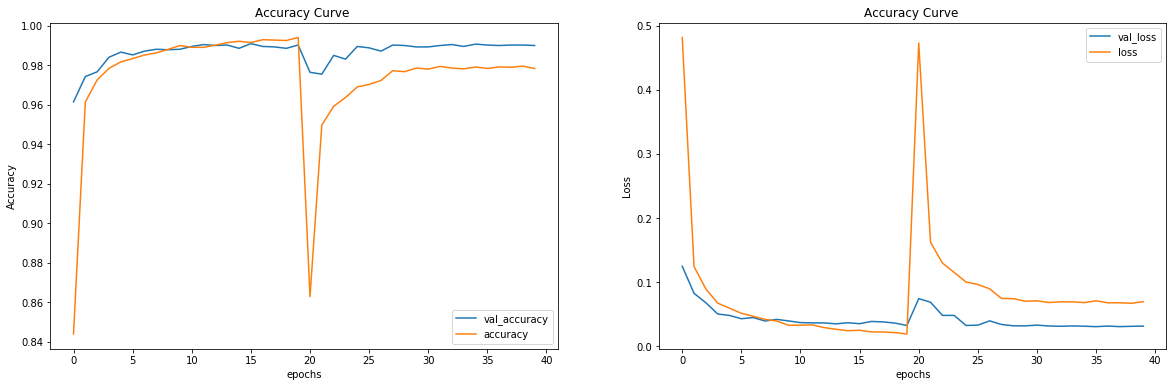

In [30]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(history.epoch+list(np.asarray(history2.epoch)+len(history.epoch)),
         history.history['val_accuracy']+history2.history['val_accuracy'],label="val_accuracy")
plt.plot(history.epoch+list(np.asarray(history2.epoch)+len(history.epoch)),
         history.history['accuracy']+history2.history['accuracy'],label="accuracy")
plt.title('Accuracy Curve ')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.epoch+list(np.asarray(history2.epoch)+len(history.epoch)),
         history.history['val_loss']+history2.history['val_loss'],label="val_loss")
plt.plot(history.epoch+list(np.asarray(history2.epoch)+len(history.epoch)),
         history.history['loss']+history2.history['loss'],label="loss")
plt.title('Accuracy Curve ')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
pred=model.predict(X_valid)


In [33]:
pred=np.argmax(pred,axis=1)

In [34]:
Conf_matrix=confusion_matrix(y_valid,pred)

In [35]:
import seaborn as sns

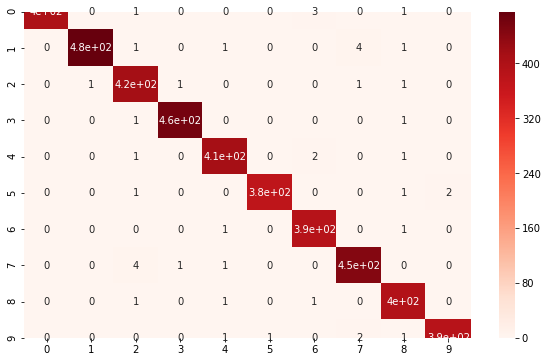

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(Conf_matrix,cmap='Reds',annot=True)

In [37]:
    error=0
    val_p=np.argmax(model.predict(X_valid),axis=1)
    confusion_mat=np.zeros([10,10])    
    for i in range(X_valid.shape[0]):
        confusion_mat[y_valid[i],val_p[i]]+=1
        if y_valid[i]!=val_p[i]:
            error+=1
    print(confusion_mat)
    print("No. of errors",error)

[[401.   0.   1.   0.   0.   0.   3.   0.   1.   0.]
 [  0. 475.   1.   0.   1.   0.   0.   4.   1.   0.]
 [  0.   1. 415.   1.   0.   0.   0.   1.   1.   0.]
 [  0.   0.   1. 461.   0.   0.   0.   0.   1.   0.]
 [  0.   0.   1.   0. 413.   0.   2.   0.   1.   0.]
 [  0.   0.   1.   0.   0. 376.   0.   0.   1.   2.]
 [  0.   0.   0.   0.   1.   0. 389.   0.   1.   0.]
 [  0.   0.   4.   1.   1.   0.   0. 446.   0.   0.]
 [  0.   0.   1.   0.   1.   0.   1.   0. 395.   0.]
 [  0.   0.   0.   0.   1.   1.   0.   2.   1. 387.]]
No. of errors 42


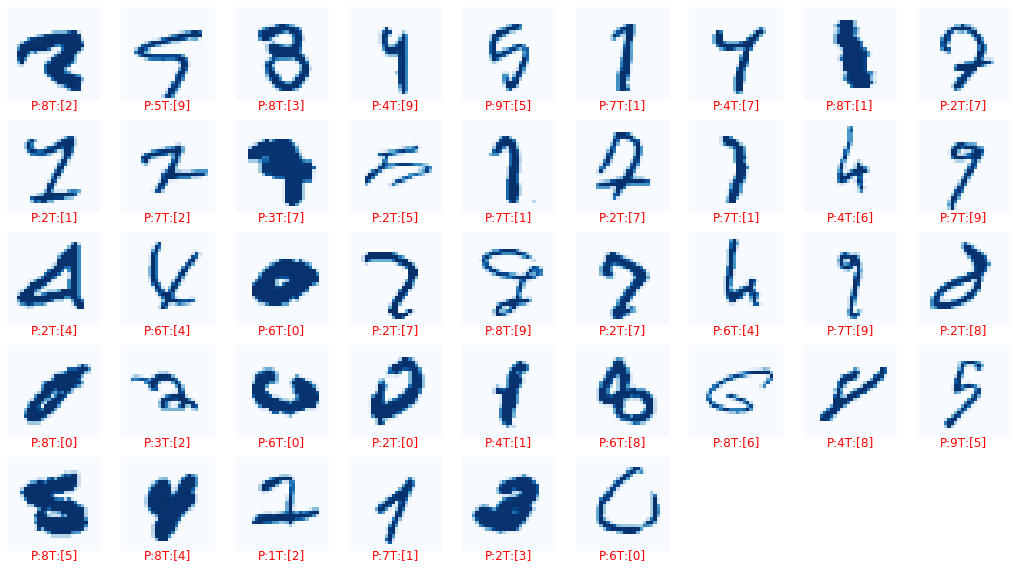

In [38]:
rows=5
cols=9
plt.figure(figsize=(2*cols,2*rows))
subplot=1
for i in range(X_valid.shape[0]):
    if y_valid[i]!=val_p[i]:
        plt.subplot(rows,cols,subplot)
        subplot+=1
        plt.imshow(X_valid[i].reshape(28,28),cmap='Blues')
        plt.axis("off")
        plt.title("P:"+str(val_p[i])+"T:"+str(y_valid[i]),y=-0.15,color="Red")
plt.show()
    
        
        
        

## Prediction on test set


In [39]:
test_pred=np.argmax(model.predict(test),axis=1)

In [46]:
from keras import models

In [40]:
model.input

<tf.Tensor 'conv2d_1_input:0' shape=(None, 28, 28, 1) dtype=float32>

In [44]:
output_layers=[layer.output for layer in model.layers[:-4]]
  

In [45]:
output_layers


[<tf.Tensor 'conv2d_1/BiasAdd:0' shape=(None, 28, 28, 32) dtype=float32>,
 <tf.Tensor 'leaky_re_lu_1/LeakyRelu:0' shape=(None, 28, 28, 32) dtype=float32>,
 <tf.Tensor 'conv2d_2/BiasAdd:0' shape=(None, 28, 28, 32) dtype=float32>,
 <tf.Tensor 'leaky_re_lu_2/LeakyRelu:0' shape=(None, 28, 28, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(None, 14, 14, 32) dtype=float32>,
 <tf.Tensor 'dropout_1/cond/Identity:0' shape=(None, 14, 14, 32) dtype=float32>,
 <tf.Tensor 'conv2d_3/BiasAdd:0' shape=(None, 14, 14, 32) dtype=float32>,
 <tf.Tensor 'leaky_re_lu_3/LeakyRelu:0' shape=(None, 14, 14, 32) dtype=float32>,
 <tf.Tensor 'conv2d_4/BiasAdd:0' shape=(None, 14, 14, 32) dtype=float32>,
 <tf.Tensor 'leaky_re_lu_4/LeakyRelu:0' shape=(None, 14, 14, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(None, 7, 7, 32) dtype=float32>,
 <tf.Tensor 'dropout_2/cond/Identity:0' shape=(None, 7, 7, 32) dtype=float32>]

In [ ]:
activation_model=models.Model(inputs=model.input,outputs=output_layers)